#Verilerin Sınıflandırma  İle tahmin edilmesi

In [131]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [132]:
df = pd.read_csv("cleaned_data.csv")

In [133]:
print((df.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   model        1419 non-null   object
 1   model_detay  1419 non-null   object
 2   model_yili   1419 non-null   int64 
 3   fiyat        1419 non-null   int64 
 4   sehir        1419 non-null   object
 5   ilce         1419 non-null   object
 6   ilan_turu    1419 non-null   object
 7   tip          1419 non-null   object
 8   marka        1419 non-null   object
 9   motor_hacmi  1419 non-null   object
 10  motor_tipi   1419 non-null   object
 11  donanim      1419 non-null   object
dtypes: int64(2), object(10)
memory usage: 133.2+ KB
None


In [134]:
df["model"]        = df["model"].astype("category")
df["model_detay"]  = df["model_detay"].astype("category")
df["sehir"]        = df["sehir"].astype("category")
df["ilce"]         = df["ilce"].astype("category")
df["ilan_turu"]    = df["ilan_turu"].astype("category")
df["tip"]          = df["tip"].astype("category")
df["marka"]        = df["marka"].astype("category")
df["motor_hacmi"]  = df["motor_hacmi"].astype("category")
df["motor_tipi"]   = df["motor_tipi"].astype("category")
df["donanim"]      = df["donanim"].astype("category")

In [135]:
print((df.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   model        1419 non-null   category
 1   model_detay  1419 non-null   category
 2   model_yili   1419 non-null   int64   
 3   fiyat        1419 non-null   int64   
 4   sehir        1419 non-null   category
 5   ilce         1419 non-null   category
 6   ilan_turu    1419 non-null   category
 7   tip          1419 non-null   category
 8   marka        1419 non-null   category
 9   motor_hacmi  1419 non-null   category
 10  motor_tipi   1419 non-null   category
 11  donanim      1419 non-null   category
dtypes: category(10), int64(2)
memory usage: 132.8 KB
None


In [136]:
categorical_features = [
    'model',
    'model_detay',
    'sehir',
    'ilce',
    'ilan_turu',
    'tip',
    'marka',
    'motor_hacmi',
    'motor_tipi',
    'donanim'
]
numerical_features = [
    'model_yili',
]

In [137]:
full_pipeline = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [138]:
X = df.drop('fiyat', axis=1) 
y = df['fiyat']

In [139]:
# Fiyatı sınıflara böl
bins = [0, 500000, 750000, 1000000, 1250000, 1500000, 2000000, df['fiyat'].max()]
labels = [x for x in range(1, len(bins))]
print((bins))
print(labels)

[0, 500000, 750000, 1000000, 1250000, 1500000, 2000000, 2260000]
[1, 2, 3, 4, 5, 6, 7]


In [140]:
# Fiyatı sınıflandırmak için
y = pd.cut(df['fiyat'], bins=bins, labels=labels, include_lowest=True)

# Uç sınıfları birleştir
y = y.replace({7: 6}) 
print(y.unique())

[5, 4, 6, 1, 2, 3]
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]


In [141]:
print(y.isnull().sum())  # 0 çıkmalı

0


In [142]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [143]:
model = Pipeline([
    ('preparation', full_pipeline),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [144]:
model.fit(X_train, y_train)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['model_yili']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['model', 'model_detay',
                                                   'sehir', 'ilce', 'ilan_turu',
                                                   'tip', 'marka',
                                                   'motor_hacmi', 'motor_tipi',
                                                   'donanim'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [145]:
y_pred = model.predict(X_test)

In [146]:
print(confusion_matrix(y_test, y_pred))

[[50  3  1  0  0  0]
 [ 7 54  7  0  0  0]
 [ 3 10 44  5  0  0]
 [ 1  1  2 38  4  1]
 [ 0  0  1  3 16  6]
 [ 0  2  0  4  2 19]]


In [147]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.93      0.87        54
           2       0.77      0.79      0.78        68
           3       0.80      0.71      0.75        62
           4       0.76      0.81      0.78        47
           5       0.73      0.62      0.67        26
           6       0.73      0.70      0.72        27

    accuracy                           0.78       284
   macro avg       0.77      0.76      0.76       284
weighted avg       0.78      0.78      0.78       284



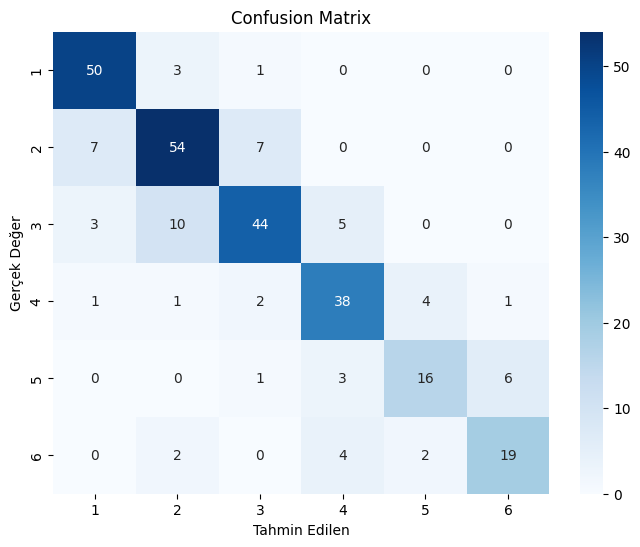

In [148]:
# Karışıklık matrisi hesapla
cm = confusion_matrix(y_test, y_pred)
labels = sorted(y_test.unique())

# Görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.title('Confusion Matrix')
plt.show()


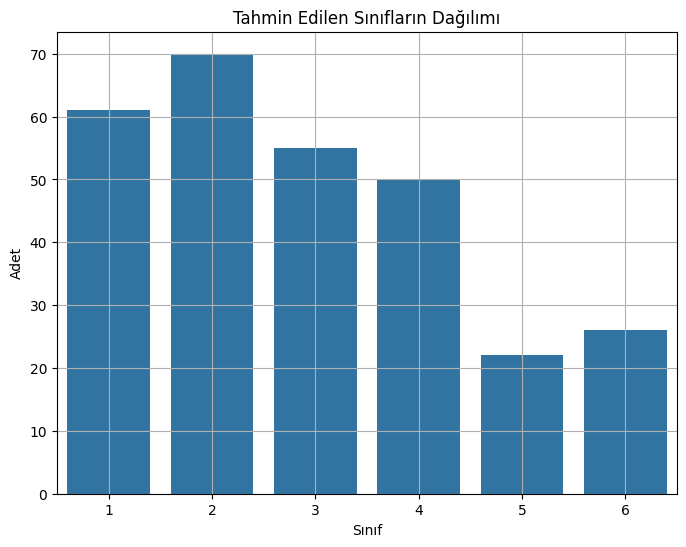

In [149]:
# Gerçrk ve tahmin edilen değerleri içeren DataFrame oluşur
df_results = pd.DataFrame({
    'Gerçek': y_test,
    'Tahmin': y_pred
})

# Tahmin sınıflarının dağılımı
plt.figure(figsize=(8, 6))
sns.countplot(data=df_results, x='Tahmin', order=sorted(df_results['Tahmin'].unique()))
plt.title("Tahmin Edilen Sınıfların Dağılımı")
plt.xlabel("Sınıf")
plt.ylabel("Adet")
plt.grid(True)
plt.show()

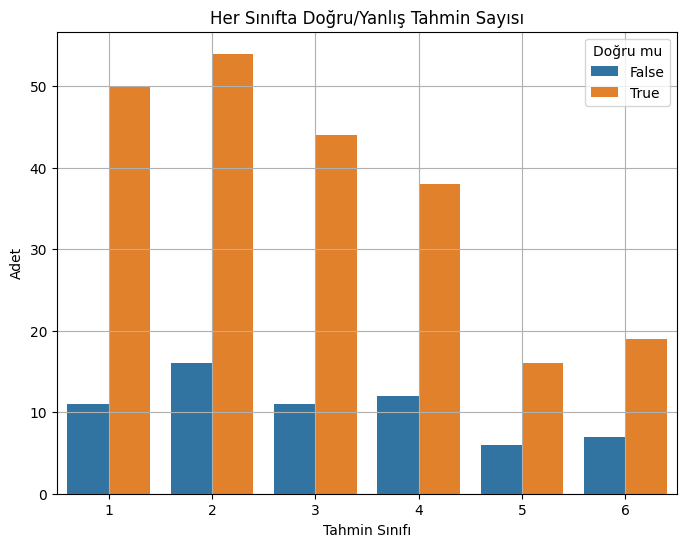

In [150]:
# Doğru ve yanlış tahminlerin sayısını gösteren bir sütun ekle 
df_results['Doğru mu'] = df_results['Gerçek'] == df_results['Tahmin']

plt.figure(figsize=(8, 6))
sns.countplot(data=df_results, x='Tahmin', hue='Doğru mu', order=sorted(df_results['Tahmin'].unique()))
plt.title("Her Sınıfta Doğru/Yanlış Tahmin Sayısı")
plt.xlabel("Tahmin Sınıfı")
plt.ylabel("Adet")
plt.grid(True)
plt.show()